In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#โหลดฟังก์ชั่นที่เราเขียนไว้
from getData import *
import os


#get current path
cwd = os.getcwd()

#set data path
path = cwd+'/Data/egdata' # you can use your path
#download dataframe allStocks.csv
allStocks = pd.read_csv(path+'/allStocks.CSV')

In [14]:
stocklist = ['SCB', 'HMPRO', 'CPF', 'TMB','STA']
port = pd.DataFrame()
for i in range(0,len(stocklist)):
    stock = getStock(stocklist[i], allStocks)
    port[i] = stock['Close']

port.columns = stocklist
port.head()

,SCB,HMPRO,CPF,TMB,STA
Date,,,,,
1984-01-04,16.3211,NaN,NaN,11.284,NaN
1984-01-05,16.2487,NaN,NaN,11.284,NaN
1984-01-06,16.3211,NaN,NaN,11.284,NaN
1984-01-09,16.3211,NaN,NaN,11.284,NaN
1984-01-10,16.3211,NaN,NaN,NaN,NaN


In [15]:
port.dropna(inplace=True)
port.head()

,SCB,HMPRO,CPF,TMB,STA
Date,,,,,
2001-10-30,14.50,0.6383,5.1,4.0508,1.7784
2001-10-31,14.75,0.6215,5.2,4.0508,1.7296
2001-11-01,14.50,0.6215,5.2,3.9647,1.7784
2001-11-02,14.50,0.5879,5.1,3.9647,1.7540
2001-11-05,14.50,0.5643,5.1,3.9647,1.7053


Normalization

$$
\frac {P_t}{P_0} * 100
$$

In [16]:
portNorm = (port/port.iloc[0]) *100
portNorm.columns = stocklist
portNorm.head()

,SCB,HMPRO,CPF,TMB,STA
Date,,,,,
2001-10-30,100.000000,100.000000,100.000000,100.000000,100.000000
2001-10-31,101.724138,97.368009,101.960784,100.000000,97.255960
2001-11-01,100.000000,97.368009,101.960784,97.874494,100.000000
2001-11-02,100.000000,92.104026,100.000000,97.874494,98.627980
2001-11-05,100.000000,88.406705,100.000000,97.874494,95.889564


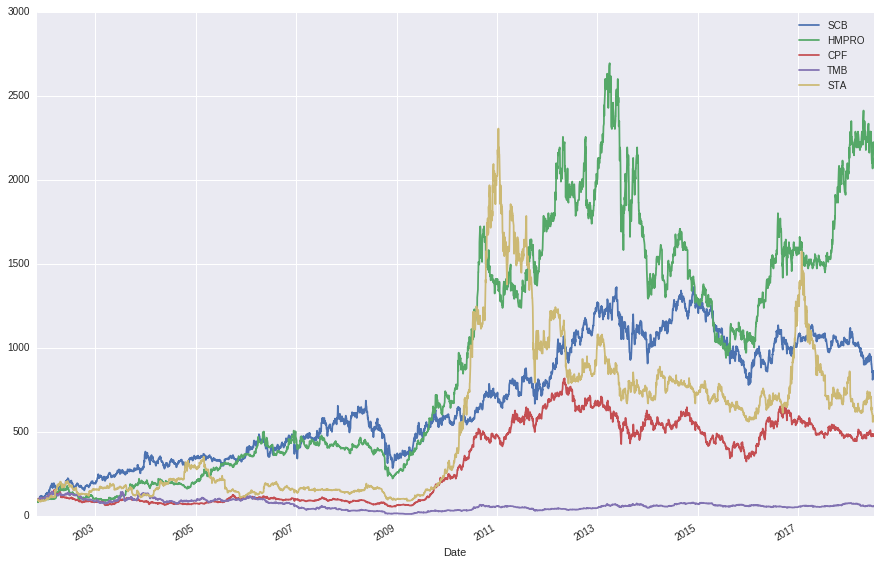

In [17]:
#กำหนดขนาดรูปให้เป็น Default
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

portNorm.plot()

In [18]:
portReturns = portNorm.pct_change()
portReturns.head()

,SCB,HMPRO,CPF,TMB,STA
Date,,,,,
2001-10-30,NaN,NaN,NaN,NaN,NaN
2001-10-31,0.017241,-0.026320,0.019608,0.000000,-0.027440
2001-11-01,-0.016949,0.000000,0.000000,-0.021255,0.028215
2001-11-02,0.000000,-0.054063,-0.019231,0.000000,-0.013720
2001-11-05,0.000000,-0.040143,0.000000,0.000000,-0.027765


In [19]:
weights = np.array([0.2, 0.2, 0.2, 0.2,0.2])

In [20]:
np.dot(portReturns, weights)

array([        nan, -0.00338222, -0.00199792, ...,  0.00273522,
       -0.01536992,  0.00601442])

In [21]:
annual_returns = portReturns.mean() * 245
annual_returns

SCB      0.183364
HMPRO    0.250458
CPF      0.141560
TMB      0.039729
STA      0.188712
dtype: float64

In [22]:
print('Port return:', np.round(np.dot(annual_returns, weights)*100,2))

Port return: 16.08


# Portfolio Variance & Volatility

(w1*sigma1+w2*sigma2)**2 

w1+w2=1

In [23]:
pvar = np.dot(weights.T,np.dot(portReturns.cov()*245,weights))
print('portfolio variance:',pvar)

portfolio variance: 0.05252115685241206


In [24]:
pvol = np.dot(weights.T,np.dot(portReturns.cov()*245,weights))**0.5
print('portfolio volatility:',pvol,'%')

portfolio volatility: 0.22917494813441555 %
